<a href="https://colab.research.google.com/github/agmarrugo/computer-vision-utb/blob/main/notebooks/lab_linear_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear filters - Laboratory practice

Andres Marrugo, PhD    
Universidad Tecnológica de Bolívar

In this laboratory practice you will learn the fundamentals of linear filters and how they operate on images.

In [29]:
from scipy import signal
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import skimage

# Sample image
image = np.uint8(misc.ascent())

# Let's define a 3x3 box filter
box_fil = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]]) * 1/9
image_filtered = signal.convolve2d(image, box_fil, boundary='symm', mode='same')



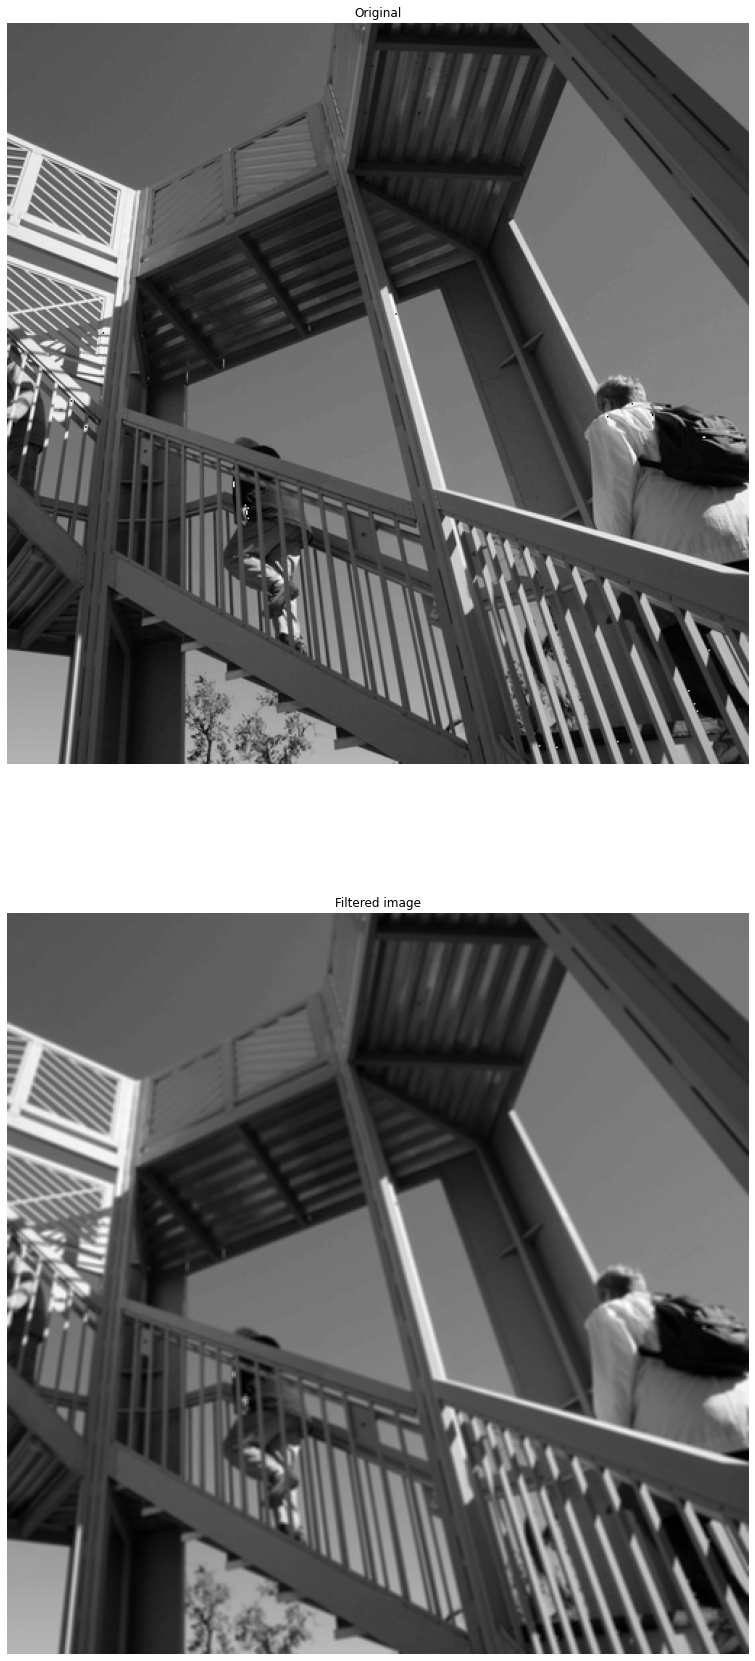

In [30]:
# Let's plot them
fig, (ax_orig, ax_mag) = plt.subplots(2, 1, figsize=(20, 30))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(image_filtered, cmap='gray')
ax_mag.set_title('Filtered image')
ax_mag.set_axis_off()
fig.show()


In [ ]:
# TODO

# Try the different boundary options = {‘fill’, ‘wrap’, ‘symm’}
# Try the different modes {‘full’, ‘valid’, ‘same’}
# How does the result change?

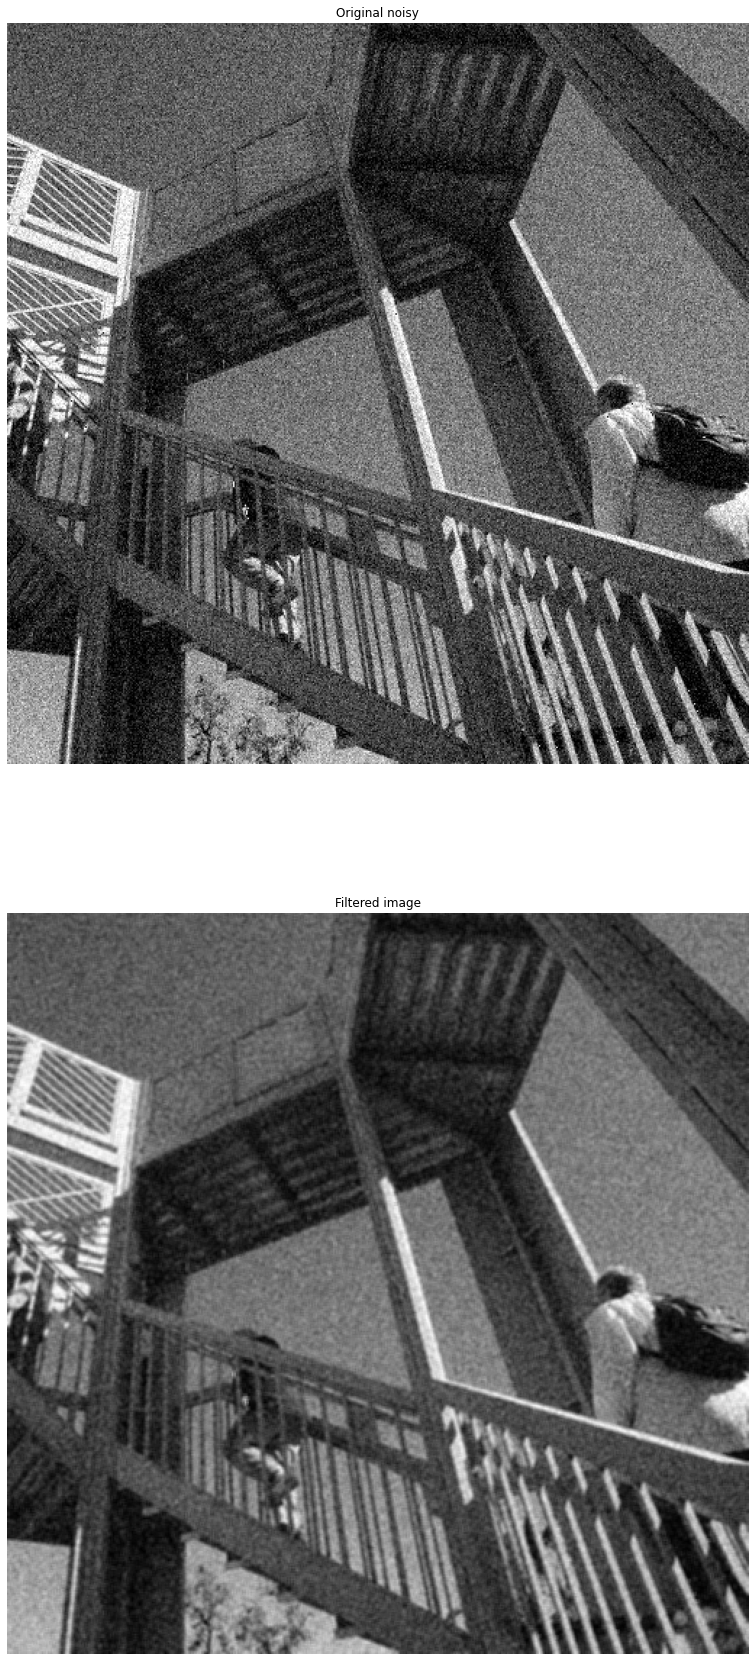

In [31]:
# Let's add noise to the image and filter it

image_noisy = skimage.util.random_noise(image, mode='gaussian', seed=None, clip=True)
# print(image)

# we convert back to uint8
# image_noisy = np.uint8(image_noisy)
image_noisy = skimage.img_as_ubyte(image_noisy)

image_filtered = signal.convolve2d(image_noisy, box_fil, boundary='symm', mode='same')

fig, (ax_orig, ax_mag) = plt.subplots(2, 1, figsize=(20, 30))
ax_orig.imshow(image_noisy, cmap='gray')
ax_orig.set_title('Original noisy')
ax_orig.set_axis_off()
ax_mag.imshow(image_filtered, cmap='gray')
ax_mag.set_title('Filtered image')
ax_mag.set_axis_off()
fig.show()

In [27]:
# TODO

# Try with other types of noise ‘pepper’, ‘s&p’, ‘speckle’ 

dtype('int64')

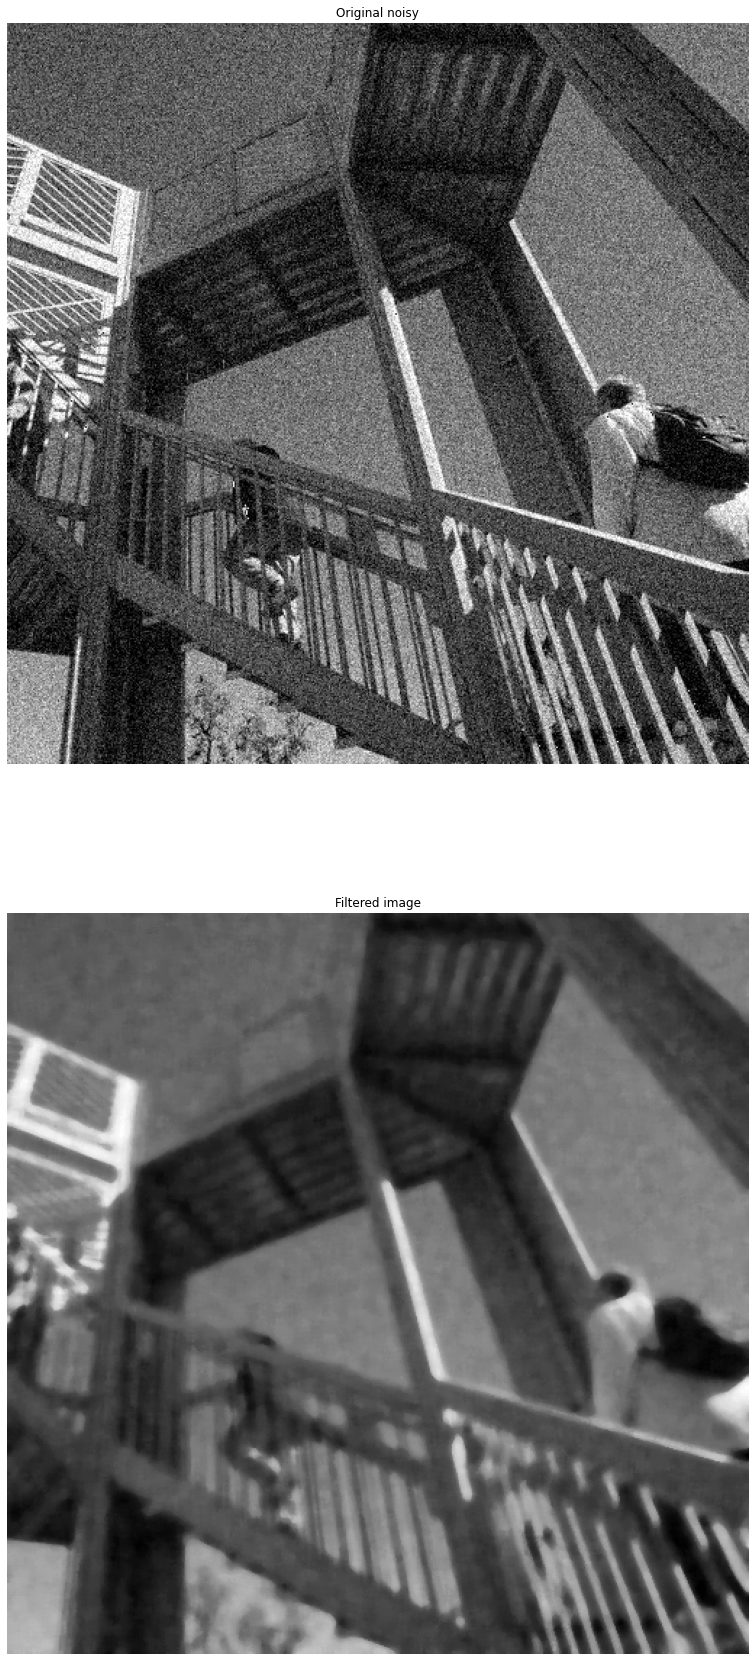

In [34]:
# Let's try other types of filters

from skimage.morphology import disk

med = skimage.filters.median(image_noisy, disk(5))

fig, (ax_orig, ax_mag) = plt.subplots(2, 1, figsize=(20, 30))
ax_orig.imshow(image_noisy, cmap='gray')
ax_orig.set_title('Original noisy')
ax_orig.set_axis_off()
ax_mag.imshow(med, cmap='gray')
ax_mag.set_title('Filtered image')
ax_mag.set_axis_off()
fig.show()

In [ ]:
# TODO try other filters
# Prewit, Sobel, unsharp, laplacian